In [1]:
# loading required libraries for the project
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import Capstone_Group10_Utility as util
import importlib
importlib.reload(util)
%matplotlib inline

In [2]:
# loading the dataset
url ='http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2021-11-04/data/listings.csv.gz'
pd_df = util.rd_csv_file(url)

In [3]:
#checking the dimensions of the dataset
pd_df.shape

(5402, 74)

In [4]:
pd_df.columns     # columns of the dataset

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [5]:
# checking for columns with their Null value percentages
null_percent = pd_df.isnull().sum() * 100 / len(pd_df)
null_value_percent = pd.DataFrame({'Column_Name': pd_df.columns, 'Null Percentage': null_percent})
null_value_percent[null_value_percent['Null Percentage'] > 0].sort_values(by= 'Null Percentage', ascending=False)

,Column_Name,Null Percentage
calendar_updated,calendar_updated,100.000000
bathrooms,bathrooms,100.000000
neighbourhood_group_cleansed,neighbourhood_group_cleansed,100.000000
host_neighbourhood,host_neighbourhood,41.336542
host_about,host_about,36.005183
host_response_time,host_response_time,32.580526
host_response_rate,host_response_rate,32.580526
host_acceptance_rate,host_acceptance_rate,27.860052
neighbourhood,neighbourhood,27.656424
neighborhood_overview,neighborhood_overview,27.656424


In [6]:
# select columns from pd_listings
pd_listings = pd_df[['id','name','neighbourhood_cleansed','latitude','longitude','property_type','room_type','accommodates','bedrooms','beds','amenities','price','minimum_nights','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']]

In [7]:
pd_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5402 entries, 0 to 5401
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           5402 non-null   int64  
 1   name                         5402 non-null   object 
 2   neighbourhood_cleansed       5402 non-null   object 
 3   latitude                     5402 non-null   float64
 4   longitude                    5402 non-null   float64
 5   property_type                5402 non-null   object 
 6   room_type                    5402 non-null   object 
 7   accommodates                 5402 non-null   int64  
 8   bedrooms                     5081 non-null   float64
 9   beds                         5163 non-null   float64
 10  amenities                    5402 non-null   object 
 11  price                        5402 non-null   object 
 12  minimum_nights               5402 non-null   int64  
 13  number_of_reviews 

In [8]:
pd_listings.dtypes.value_counts()

float64    11
object      6
int64       4
dtype: int64

In [9]:
pd_listings['price'] = util.convert_price(pd_listings.price)

c:\Users\durga\Documents\GitHub\AST\Capstone_Group10_Utility.py:38: FutureWarning: The default value of regex will change from True to False in a future version.
  return var.str.replace("[$, ]", "").astype("float")
<ipython-input-9-c5a5e2ccb5f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_listings['price'] = util.convert_price(pd_listings.price)


In [10]:
pd_listings.at[pd_listings['bedrooms'].isnull(), 'bedrooms'] = 0 # yea there are 6 that has no bedrooms, but they do have 1 bathrooms
pd_listings.at[pd_listings['beds'].isnull(), 'beds'] = 0 # there's one listing for 1 guest, without any beds

pd_listings.at[pd_listings['review_scores_rating'].isnull(), 'review_scores_rating'] = 0
pd_listings.at[pd_listings['review_scores_accuracy'].isnull(), 'review_scores_accuracy'] = 0
pd_listings.at[pd_listings['review_scores_cleanliness'].isnull(), 'review_scores_cleanliness'] = 0
pd_listings.at[pd_listings['review_scores_checkin'].isnull(), 'review_scores_checkin'] = 0
pd_listings.at[pd_listings['review_scores_communication'].isnull(), 'review_scores_communication'] = 0
pd_listings.at[pd_listings['review_scores_location'].isnull(), 'review_scores_location'] = 0
pd_listings.at[pd_listings['review_scores_value'].isnull(), 'review_scores_value'] = 0

pd_listings.rename(columns={'id':'listing_id'}, inplace=True)

C:\Users\durga\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\durga\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [11]:
# Loading data from reviews:
url='http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2021-11-04/data/reviews.csv.gz'
pd_reviews = util.rd_csv_file(url)

In [12]:
pd_reviews = pd_reviews[['id','listing_id','date']]

# basic conversions
pd_reviews['date'] = pd.to_datetime(pd_reviews['date'])


In [13]:
#check listings, reviews data count
print(sum(pd_listings['number_of_reviews']),len(pd_reviews))

266861 266861


In [14]:
pd_reviews.head()

,id,listing_id,date
0,1191,2818,2009-03-30
1,1771,2818,2009-04-24
2,1989,2818,2009-05-03
3,2797,2818,2009-05-18
4,3151,2818,2009-05-25


In [15]:
pd_listing_count_reviws = pd_reviews[['listing_id','id']].groupby(['listing_id']).count()
pd_listing_count_reviws.columns = ['# of reviews']
pd_listings_plus_reviews = pd.merge(pd_listings, pd_listing_count_reviws, on='listing_id')
pd_listings_plus_reviews.at[pd_listings_plus_reviews['# of reviews'].isnull(), '# of reviews'] = 0
#pd_listings_plus_reviews[pd_listings_plus_reviews['# of reviews'] != pd_listings_plus_reviews['number_of_reviews']]

In [16]:
# Calculate estimated revenue for each listing

# get estimated bookings based on reviews
pd_bookings = pd.merge(pd_reviews, pd_listings, on='listing_id')
pd_bookings['estimated_revenue'] = util.calc_revenue(pd_bookings.price, pd_bookings.minimum_nights)

# get revenue by listings
pd_listings_revenue = pd_bookings[['listing_id','estimated_revenue']].groupby(['listing_id']).sum()


pd_listings = pd.merge(pd_listings, pd_listings_revenue, on='listing_id', how='left')
pd_listings.at[pd_listings['estimated_revenue'].isnull(), 'estimated_revenue'] = 0

In [17]:
# Top 5 highest revenue listings
pd_listings[['listing_id','number_of_reviews','minimum_nights','accommodates','bedrooms','beds','estimated_revenue']].sort_values('estimated_revenue', ascending=False).head()

,listing_id,number_of_reviews,minimum_nights,accommodates,bedrooms,beds,estimated_revenue
794,5114153,37,1000,2,1.0,1.0,5883000.0
2240,19183967,103,300,4,1.0,2.0,4511400.0
2198,18816109,24,1001,4,2.0,1.0,2906904.0
1048,7332860,333,180,1,1.0,1.0,2697300.0
1055,7382264,321,180,2,1.0,1.0,2600100.0


In [18]:
pd_listings[['listing_id','minimum_nights']].groupby(['minimum_nights']).count().sort_values('minimum_nights')

,listing_id
minimum_nights,
1,1060
2,1864
3,1336
4,421
5,286
6,62
7,222
8,10
9,3


In [19]:
# Top 5 highest revenue listings (minimum_nights <= 7)
pd_listings.loc[pd_listings['minimum_nights']<=7, ['listing_id','number_of_reviews','minimum_nights','accommodates','bedrooms','beds','estimated_revenue']].sort_values('estimated_revenue', ascending=False).head()

,listing_id,number_of_reviews,minimum_nights,accommodates,bedrooms,beds,estimated_revenue
182,854328,332,7,4,3.0,3.0,581000.0
85,510836,110,7,7,5.0,8.0,561330.0
169,785432,814,2,4,2.0,3.0,325600.0
239,1044452,286,7,2,1.0,1.0,300300.0
70,422044,135,7,4,3.0,5.0,273105.0


In [20]:
# Showing 5 highest revenue listings (minimum_nights <= 4)
pd_listings.loc[pd_listings['minimum_nights']<=4, ['listing_id','number_of_reviews','minimum_nights','accommodates','bedrooms','beds','estimated_revenue']].sort_values('estimated_revenue', ascending=False).head()

,listing_id,number_of_reviews,minimum_nights,accommodates,bedrooms,beds,estimated_revenue
169,785432,814,2,4,2.0,3.0,325600.0
152,754613,288,4,4,1.0,3.0,259200.0
56,327285,535,3,4,1.0,4.0,237540.0
342,1601408,228,4,4,2.0,2.0,228000.0
563,3194778,201,4,4,2.0,5.0,201000.0


In [21]:
# Correlation between minimum nights and estimated revenue (not filtering min night 1000)
pd_listings[['minimum_nights','estimated_revenue']].corr()

,minimum_nights,estimated_revenue
minimum_nights,1.000000,0.698641
estimated_revenue,0.698641,1.000000


In [22]:
# Correlation between minimum nights and estimated revenue (filter min night 1000,1001)
pd_listings.loc[pd_listings['minimum_nights']<=7, ['minimum_nights','estimated_revenue']].corr()

,minimum_nights,estimated_revenue
minimum_nights,1.000000,0.164124
estimated_revenue,0.164124,1.000000


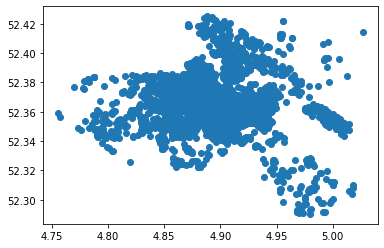

In [23]:
plt.scatter(pd_listings['longitude'], pd_listings['latitude'])

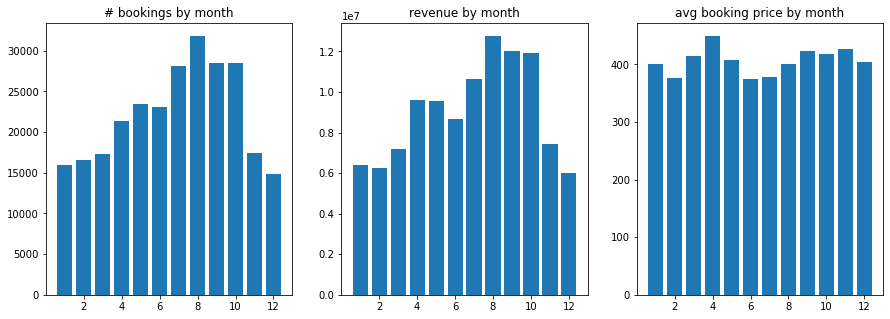

In [24]:
# Best months for rental?

plt.figure(figsize=(15, 5))

# # bookings by month
plotdata = pd_reviews[['date']].groupby(pd_reviews["date"].dt.month).count()
plotdata.rename(columns={'date':'# of bookings'}, inplace=True)

ax = plt.subplot(1, 3, 1)
ax.set_title("# bookings by month")
plt.bar(plotdata.index, plotdata['# of bookings'])

# revenue by month
plotdata2 = pd_bookings[['date','estimated_revenue']].groupby(pd_bookings["date"].dt.month).sum()
plotdata2.rename(columns={'estimated_revenue':'revenue'}, inplace=True)

ax = plt.subplot(1, 3, 2)
ax.set_title("revenue by month")
plt.bar(plotdata2.index, plotdata2['revenue'])

# avg booking price by month
plotdata3 = pd.concat([plotdata, plotdata2], axis=1)
plotdata3['avg booking price'] = plotdata3['revenue'] / plotdata3['# of bookings']
plotdata3.head()

ax = plt.subplot(1, 3, 3)
ax.set_title("avg booking price by month")
plt.bar(plotdata3.index, plotdata3['avg booking price'])

_ = plt.plot()

C:\Users\durga\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


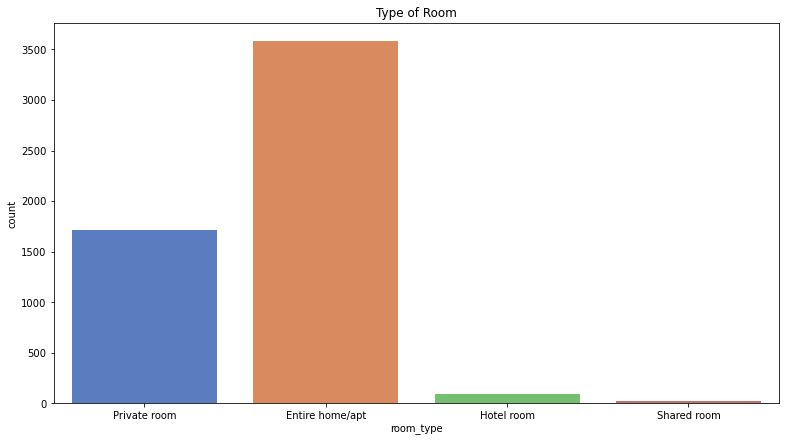

In [25]:
plt.figure(figsize=(13,7))
plt.title("Type of Room")
sns.countplot(pd_listings.room_type, palette="muted")
fig = plt.gcf()
plt.show()

In [26]:
min_threshold,max_threshold= pd_listings.price.quantile([0.01,0.999])
min_threshold,max_threshold

(40.01, 1195.9900000000016)

Text(0.5, 1.0, 'Distribution of type of rooms across Amsterdam')

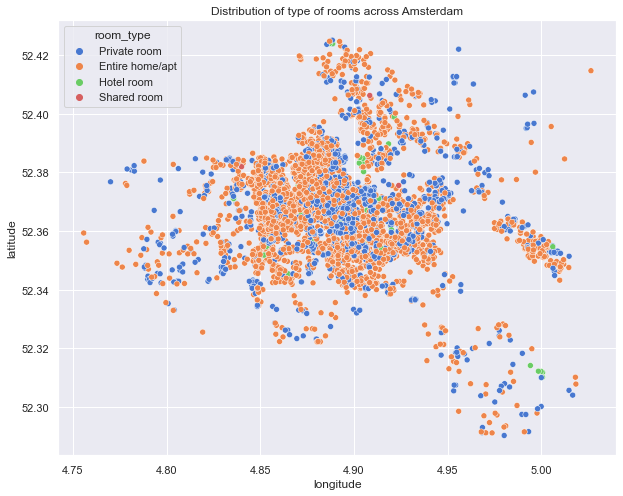

In [27]:
df_air_pnw= pd_listings[(pd_listings.price>min_threshold)&(pd_listings.price<max_threshold)]
sns.set(rc={"figure.figsize": (10, 8)})
ax= sns.scatterplot(x=df_air_pnw.longitude, y=df_air_pnw.latitude,hue=pd_listings.room_type,palette='muted')
ax.set_title('Distribution of type of rooms across Amsterdam')

                                        estimated_revenue
neighbourhood_cleansed                                   
IJburg - Zeeburgereiland                     42877.764331
Centrum-West                                 36511.600950
De Pijp - Rivierenbuurt                      24995.337662
Centrum-Oost                                 22428.404221
Westerpark                                   18197.002762
Zuid                                         16313.270423
Watergraafsmeer                              15846.006993
De Baarsjes - Oud-West                       14629.162437
De Aker - Nieuw Sloten                       14378.729167
Oud-Noord                                    13789.148936
Bos en Lommer                                12310.876652
Oud-Oost                                     11290.251634
Oostelijk Havengebied - Indische Buurt       10616.287129
Osdorp                                       10299.054054
Slotervaart                                  10170.387755
Noord-Oost    

C:\Users\durga\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\durga\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


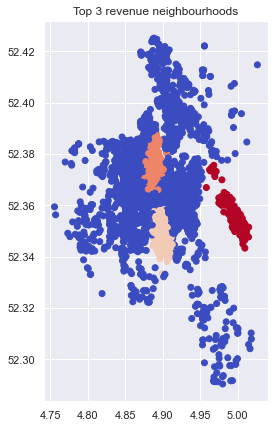

In [28]:
pd_neighbourhood_revenue = pd_listings[['neighbourhood_cleansed','estimated_revenue']].groupby(['neighbourhood_cleansed']).mean().sort_values('estimated_revenue', ascending=False)
print(pd_neighbourhood_revenue)

pd_listings_plot = pd_listings[['neighbourhood_cleansed','longitude','latitude','estimated_revenue']]
pd_listings_plot.loc[:,'color'] = 0

color_value = 1
for neighbourhood in pd_neighbourhood_revenue[0:3].index:
  pd_listings_plot.at[pd_listings_plot['neighbourhood_cleansed'] == neighbourhood, 'color'] = color_value
  color_value -= 0.2
# plot
plt.figure(figsize=(4, 7))
ax = plt.subplot(1, 1, 1)
ax.set_title("Top 3 revenue neighbourhoods")
plt.scatter(pd_listings_plot['longitude'],
            pd_listings_plot['latitude'],
            cmap="coolwarm",
            c=pd_listings_plot['color']
           )

_ = plt.plot() 

<function matplotlib.pyplot.show(close=None, block=None)>

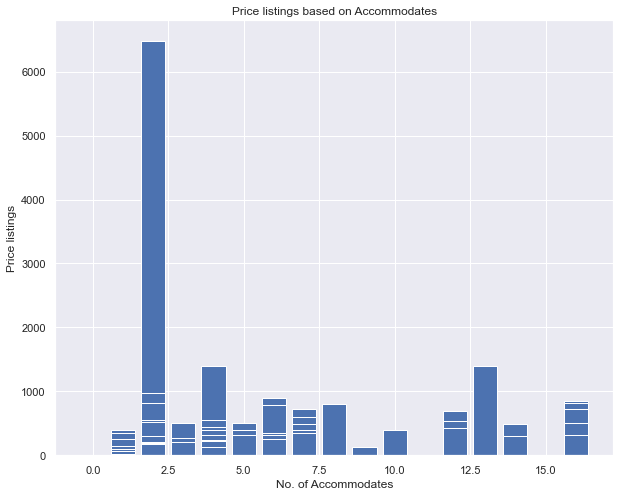

In [29]:
plt.bar(pd_listings['accommodates'],pd_listings['price'])
plt.xlabel('No. of Accommodates')
plt.ylabel('Price listings')
plt.title('Price listings based on Accommodates')
plt.show

<AxesSubplot:>

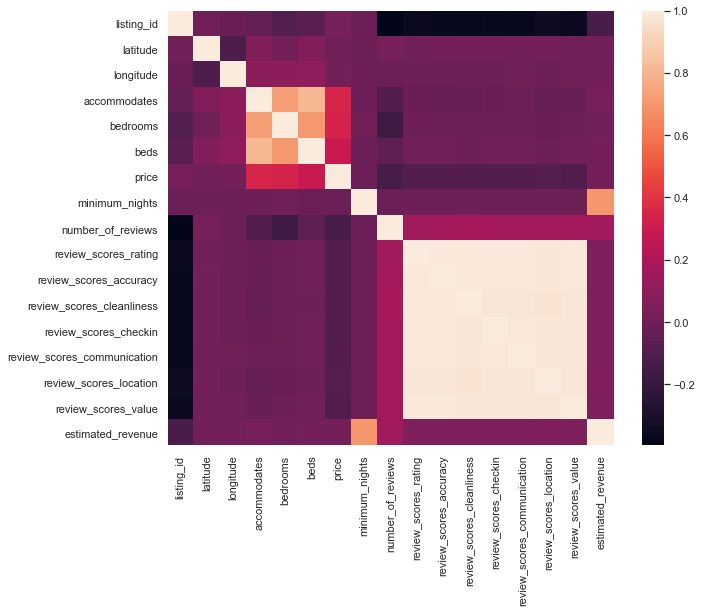

In [30]:
# Plotting Heat map for variables

sns.heatmap(pd_listings.corr())

In [31]:
# Removing price outliers
pd_listings_new = pd_listings.loc[(pd_listings['price']>50) & (pd_listings['price']<400)]

In [32]:
cond=[
    (pd_listings_new.neighbourhood_cleansed.str.contains('De Baarsjes - Oud-West')),
    (pd_listings_new.neighbourhood_cleansed.str.contains('De Pijp - Rivierenbuurt')),
    (pd_listings_new.neighbourhood_cleansed.str.contains('Centrum-West')),
    (pd_listings_new.neighbourhood_cleansed.str.contains('Centrum-Oost')),
    (pd_listings_new.neighbourhood_cleansed.str.contains('Westerpark')),
    (pd_listings_new.neighbourhood_cleansed.str.contains('Zuid')),
    (pd_listings_new.neighbourhood_cleansed.str.contains('Oud-Oost')),
    (pd_listings_new.neighbourhood_cleansed.str.contains('Bos en Lommer')),
    ~(pd_listings_new.neighbourhood_cleansed.str.contains('De Baarsjes - Oud-West|De Pijp - Rivierenbuurt|Centrum-West|Centrum-Oost|Westerpark|Zuid|Oud-Oost|Bos en Lommer')),
]

val = ['De Baarsjes - Oud-West','De Pijp - Rivierenbuurt','Centrum-West','Centrum-Oost','Westerpark','Zuid','Oud-Oost','Bos en Lommer','Other']

In [33]:
pd_listings_new['Neighbor_Group'] = np.select(cond,val)

<ipython-input-33-bb1048490f7b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_listings_new['Neighbor_Group'] = np.select(cond,val)


In [34]:
pd_listings_new.columns

Index(['listing_id', 'name', 'neighbourhood_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'estimated_revenue', 'Neighbor_Group'],
      dtype='object')

In [35]:
df_knn_model = pd_listings_new[['Neighbor_Group','room_type','accommodates','bedrooms','beds','price']]
dummies = pd.get_dummies(df_knn_model)

0.43847670536602734

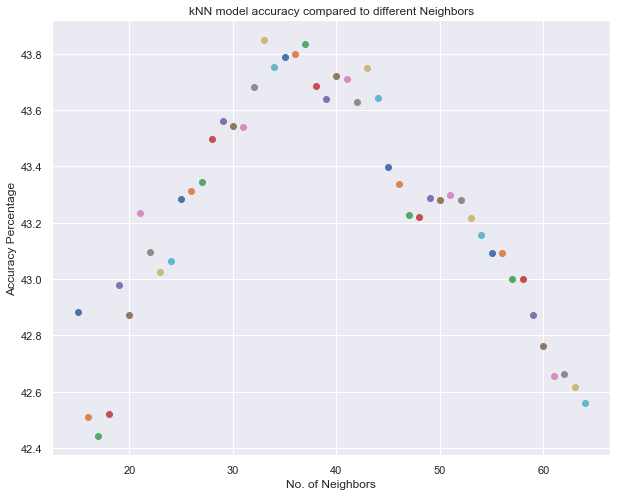

In [36]:
# KNN Regressor to predict the price according to the variables:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

max_val = []
X = dummies.drop('price',axis=1)
y = dummies['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

neighbors = np.arange(15,65)
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn_y_pred = util.knn_model(X_train,X_test,y_train,k)
    max_val.append(r2_score(y_test,knn_y_pred))
    plt.scatter(k,round(r2_score(y_test,knn_y_pred)*100,3))
    plt.xlabel('No. of Neighbors')
    plt.ylabel('Accuracy Percentage')
    plt.title('kNN model accuracy compared to different Neighbors')

max(max_val)

In [37]:
# Calculating the Root Mean Squared Value for knn model

knn_rmse = util.calc_rmse(y_test,knn_y_pred)
print(knn_rmse)

53.27179066782755


0.4446166038393061

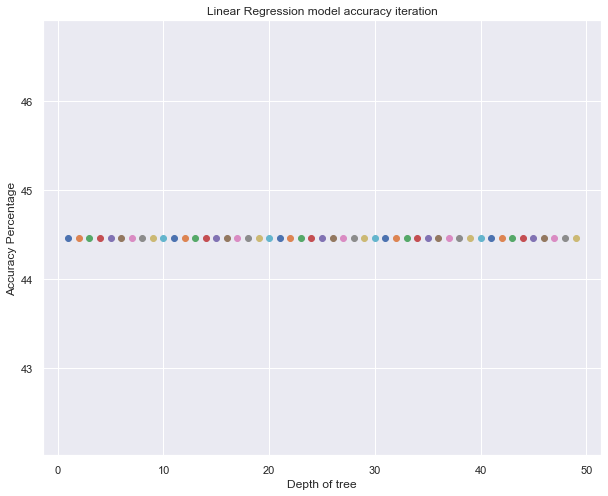

In [54]:
# Linear Regression Model
max_val = []
for i in range(1,50):
    lr_y_pred = util.Linear_Regression_model(X_train,X_test,y_train)
    max_val.append(r2_score(y_test,lr_y_pred))
    plt.scatter(i,round(r2_score(y_test, lr_y_pred)*100,3))
    plt.xlabel('Depth of tree')
    plt.ylabel('Accuracy Percentage')
    plt.title('Linear Regression model accuracy iteration')

max(max_val)

In [39]:
# Calculating the Root Mean Squared Value for Linear Regression model

lm_rmse = util.calc_rmse(y_test,lr_y_pred)
print(lm_rmse)

52.38366244241549


0.4523428002236103

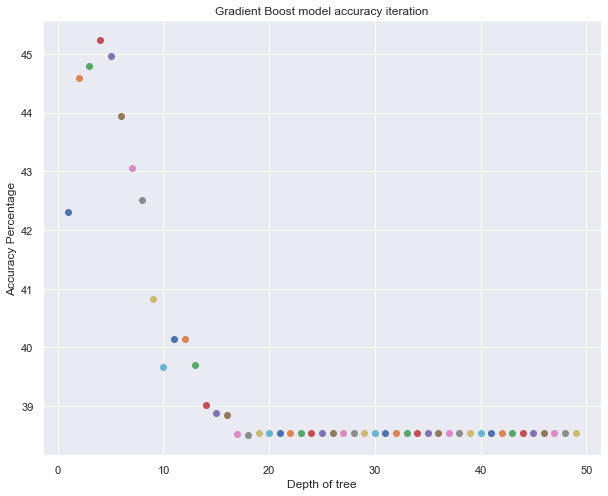

In [55]:
# Gradient Boosting Regressor model for price prediction

max_val = []

for i in range(1,50):
    gb_y_pred = util.xGBoost_model(X_train,X_test,y_train,i)
    max_val.append(r2_score(y_test,gb_y_pred))
    plt.scatter(i,round(r2_score(y_test, gb_y_pred)*100,3))
    plt.xlabel('Depth of tree')
    plt.ylabel('Accuracy Percentage')
    plt.title('Gradient Boost model accuracy iteration')

max(max_val)

In [56]:
# Calculating the Root Mean Squared Value for Gradient Boost model

gb_rmse = util.calc_rmse(y_test,gb_y_pred)
print(gb_rmse)

55.10750345045807


0.4114952136032838

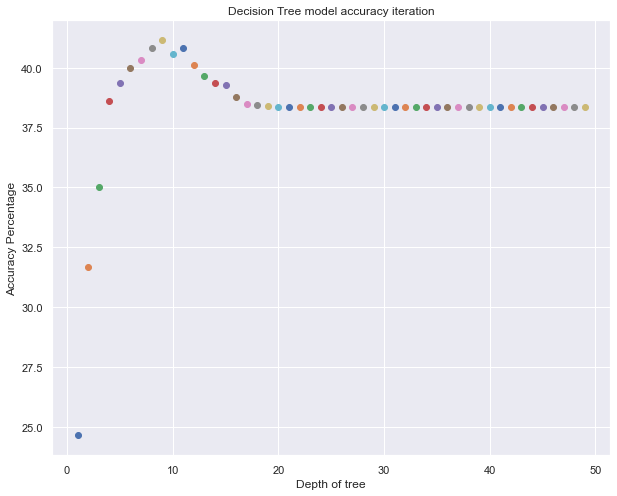

In [57]:
# Decision Tree model for price prediction
max_val = []

for i in range(1,50):
    y_dectrPred= util.Decision_Tree_model(X_train,X_test,y_train,i)
    max_val.append(r2_score(y_test,y_dectrPred))
    plt.scatter(i,round(r2_score(y_test,y_dectrPred)*100,3))
    plt.xlabel('Depth of tree')
    plt.ylabel('Accuracy Percentage')
    plt.title('Decision Tree model accuracy iteration')

max(max_val)

In [58]:
# Calculating the Root Mean Squared Value for Decision Tree model

dt_rmse = util.calc_rmse(y_test,y_dectrPred)
print(dt_rmse)

55.17884973952399


0.4458778116989387

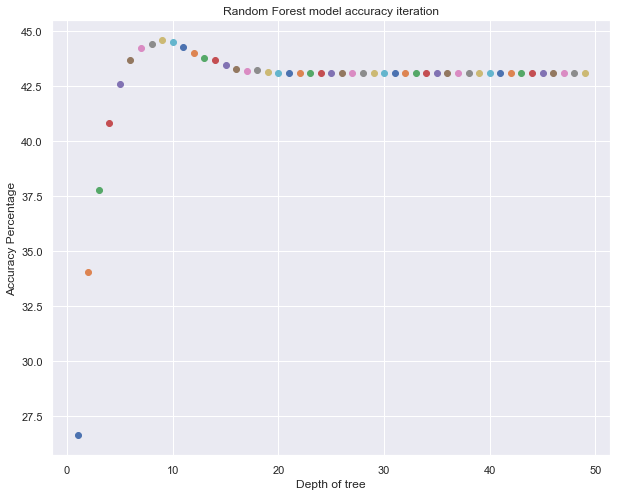

In [59]:
# Random Forest Regressor model for price prediction
max_val = []

for i in range(1,50):
    rf_y_pred= util.Random_Forest_model(X_train,X_test,y_train,i)
    max_val.append(r2_score(y_test,rf_y_pred))
    plt.scatter(i,round(r2_score(y_test,rf_y_pred)*100,3))
    plt.xlabel('Depth of tree')
    plt.ylabel('Accuracy Percentage')
    plt.title('Random Forest model accuracy iteration')

max(max_val)

In [60]:
# Calculating the Root Mean Squared Value for Random Forest model

rf_rmse = util.calc_rmse(y_test,rf_y_pred)
print(dt_rmse)

55.17884973952399
